# Softmax regression and MLP

## Steps to do:

1. get training data
2. prepare data loading
3. define model
4. define optimization procedure
5. train model (and evaluate)

### MNIST dataset

Standard benchmark dataset for image classification - hand written digits: http://yann.lecun.com/exdb/mnist/

We will use `torchvision.datasets` to load the data and explore its contents.

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
# Load the train and test MNIST data
from torchvision import datasets
mnist_train = datasets.MNIST("/content/gdrive/MyDrive/Colab Notebooks/ANN/Part 1 Exercise/traindata ",train=True, download=True)
mnist_test = datasets.MNIST("/content/gdrive/MyDrive/Colab Notebooks/ANN/Part 1 Exercise/testdata ", train=False, download=True)

100%|██████████| 9912422/9912422 [00:00<00:00, 85221626.23it/s]


Extracting /content/gdrive/MyDrive/Colab Notebooks/ANN/Part 1 Exercise/traindata /MNIST/raw/train-images-idx3-ubyte.gz to /content/gdrive/MyDrive/Colab Notebooks/ANN/Part 1 Exercise/traindata /MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 103623348.01it/s]


Extracting /content/gdrive/MyDrive/Colab Notebooks/ANN/Part 1 Exercise/traindata /MNIST/raw/train-labels-idx1-ubyte.gz to /content/gdrive/MyDrive/Colab Notebooks/ANN/Part 1 Exercise/traindata /MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 26853659.22it/s]


Extracting /content/gdrive/MyDrive/Colab Notebooks/ANN/Part 1 Exercise/traindata /MNIST/raw/t10k-images-idx3-ubyte.gz to /content/gdrive/MyDrive/Colab Notebooks/ANN/Part 1 Exercise/traindata /MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 10910955.77it/s]


Extracting /content/gdrive/MyDrive/Colab Notebooks/ANN/Part 1 Exercise/traindata /MNIST/raw/t10k-labels-idx1-ubyte.gz to /content/gdrive/MyDrive/Colab Notebooks/ANN/Part 1 Exercise/traindata /MNIST/raw



100%|██████████| 9912422/9912422 [00:00<00:00, 81970393.07it/s]


Extracting /content/gdrive/MyDrive/Colab Notebooks/ANN/Part 1 Exercise/testdata /MNIST/raw/train-images-idx3-ubyte.gz to /content/gdrive/MyDrive/Colab Notebooks/ANN/Part 1 Exercise/testdata /MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 88809159.70it/s]

Extracting /content/gdrive/MyDrive/Colab Notebooks/ANN/Part 1 Exercise/testdata /MNIST/raw/train-labels-idx1-ubyte.gz to /content/gdrive/MyDrive/Colab Notebooks/ANN/Part 1 Exercise/testdata /MNIST/raw




100%|██████████| 1648877/1648877 [00:00<00:00, 26638925.94it/s]


Extracting /content/gdrive/MyDrive/Colab Notebooks/ANN/Part 1 Exercise/testdata /MNIST/raw/t10k-images-idx3-ubyte.gz to /content/gdrive/MyDrive/Colab Notebooks/ANN/Part 1 Exercise/testdata /MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 3028219.48it/s]


Extracting /content/gdrive/MyDrive/Colab Notebooks/ANN/Part 1 Exercise/testdata /MNIST/raw/t10k-labels-idx1-ubyte.gz to /content/gdrive/MyDrive/Colab Notebooks/ANN/Part 1 Exercise/testdata /MNIST/raw



In [4]:
# Explore loaded datasets (size, content)
mnist_train

Dataset MNIST
    Number of datapoints: 60000
    Root location: /content/gdrive/MyDrive/Colab Notebooks/ANN/Part 1 Exercise/traindata 
    Split: Train

In [5]:
mnist_train[5]

(<PIL.Image.Image image mode=L size=28x28 at 0x7FC730168040>, 2)

In [6]:
# Display 10 data examples together with their labels
display(mnist_train[5][0]),mnist_train[5][1]

(None, 2)

In [7]:
import torch 
from torchvision import datasets
from torchvision import transforms
mnist_train = datasets.MNIST("/content/gdrive/MyDrive/Colab Notebooks/ANN/Part 1 Exercise/traindata ",train=True, download=True, transform=transforms.ToTensor())
mnist_test = datasets.MNIST("/content/gdrive/MyDrive/Colab Notebooks/ANN/Part 1 Exercise/testdata ", train=False, download=True, transform=transforms.ToTensor())

In [ ]:
mnist_train[5][0]

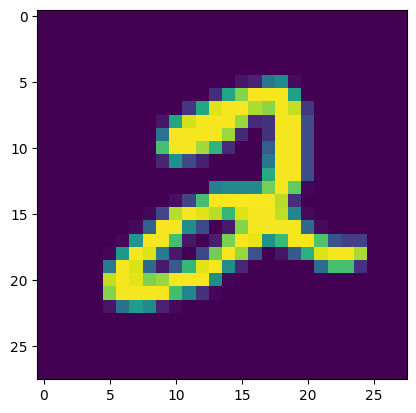

In [12]:
import matplotlib.pyplot as plt
img = mnist_train[5][0]
plt.imshow(img.squeeze())
#plt.imshow(img.squeeze(), cmap='gray')

### Data loading

Use `torch.uitls.data.DataLoader` to prepare the batch loading

In [13]:
# Construct train and test data loaders to provide batches of data
# if the data is large we do not need to use cross validation and it is not in DL
from torch.utils.data import DataLoader, TensorDataset
dl_train = DataLoader(mnist_train, batch_size=50, shuffle=True)
dl_test = DataLoader(mnist_test, batch_size=50) # no need to shuffle 

In [ ]:
for batch in dl_train:
     print(batch[0].shape,batch[1].shape)
     break
# 50 of output is 50 batch size, and 28 is image size,  number of batches, channel, height, weight = 50,1,28,28

In [ ]:
batch[1]

## Softmax model definition

Linear model for logits $\mathbf{\hat{o}} = \mathbf{x}^T \mathbf{W} + \mathbf{b}$ using `torch.nn` module and the `nn.Linear` layer therein.

In [ ]:
# Define linear model for probability logits
import torch.nn as nn
in_dim = 28*28    #batch[0]   
class_dim = 10    #batch[1] 0...9
lin_model = nn.Linear(in_dim, class_dim, bias=True)
lin_model

In [ ]:
# Flat the matrix to a long vector 
pred = lin_model(batch[0][0].flatten())
pred

In [24]:
# Containers: these are a space that is stacking layers into it
lin_model = nn.Sequential(nn.Flatten(), nn.Linear(in_dim,class_dim,bias=True))

In [ ]:
lin_model

In [ ]:
logits = lin_model(batch[0])  # output of linear layer in NN is called logits
logits

In [ ]:
logits.shape

In [ ]:
logits[0].sum()  # We see that it is not probability 

### Softmax probabilities

We use softmax function to change logits into probabilities (sum to 1 accross rows)

$$\hat{y}_j = \frac{e^{o_j}}{\sum_j e^{o_j}}$$

In [ ]:
# Define softmax function softmax(logits) -> probs
def softmax(logits):
  lexp = torch.exp(logits)
  probs = lexp/lexp.sum(dim=1, keepdim=True)
  return probs

preds=softmax(logits)
preds

In [ ]:
preds[0]

In [ ]:
preds.sum()

In [ ]:
for batch in dl_train:
  o = lin_model(batch[0])
  probs = softmax(o)
  print(probs)
  break 

### Cross-entropy loss

For classification problems we use the cross-entropy loss function.

$$\mathcal{L} = - \frac{1}{n} \sum_{i = 1}^{n} \sum_j^q y_j^{(i)} \log \hat{y}_j^{(i)} $$

In [41]:
# Define cross entropy loss function ce_loss(preds, targets) -> loss
def cross_entropy(preds, targets):  #LogSumExp
  ll = - torch.log(preds)

## Use Pytorch API to define loss

In [ ]:
# Define cross entropy loss from API
loss_func = nn.CrossEntropyLoss()
loss_func

In [ ]:
loss = loss_func(logits, batch[1])
loss

### Optimization algorithm

We use minibatch stochastic gradient descent predefined in the `nn.optim` module.

In [ ]:
# instantiate optmizier as the torch.optim.SGD
import torch.optim as optim
optimizer = optim.SGD(lin_model.parameters(), lr=0.01)
optimizer

### Model training

Follows the same logic as for linear regression problem

In [53]:
# write the training procedure
dl_train = DataLoader(mnist_train, batch_size=50, shuffle=True)
dl_test = DataLoader(mnist_test, batch_size=50) # no need to shuffle 
lin_model = nn.Sequential(nn.Flatten(), nn.Linear(in_dim,class_dim,bias=True))
loss_func = nn.CrossEntropyLoss()
loss = loss_func(logits, batch[1])
optimizer = optim.SGD(lin_model.parameters(), lr=0.01)

max_epochs = 2
losses = []
for epoch in range(max_epochs):
  for batch in dl_train:
    x_batch, y_batch =  batch[0], batch[1]
    preds =  lin_model(x_batch) #Predictions
    loss = loss_func(preds,y_batch)
    loss.backward() # get gradients
    optimizer.zero_grad()
    optimizer.step()
    #print(f'Loss {loss}')
    losses.append(loss.item())
  print(losses)

[2.3294568061828613, 2.2931506633758545, 2.329101800918579, 2.3359737396240234, 2.310537576675415, 2.2890403270721436, 2.3351662158966064, 2.306533098220825, 2.269742965698242, 2.320530414581299, 2.3018743991851807, 2.3832013607025146, 2.3479297161102295, 2.3194386959075928, 2.2997095584869385, 2.3145556449890137, 2.3616690635681152, 2.2926018238067627, 2.2769172191619873, 2.33723521232605, 2.3394951820373535, 2.303847074508667, 2.318030595779419, 2.3123648166656494, 2.3339953422546387, 2.316868782043457, 2.3221919536590576, 2.35943603515625, 2.307551622390747, 2.3430492877960205, 2.286452293395996, 2.336962938308716, 2.3241043090820312, 2.2963953018188477, 2.3533575534820557, 2.3789615631103516, 2.3144266605377197, 2.353614091873169, 2.331601619720459, 2.353508234024048, 2.28812575340271, 2.2989351749420166, 2.343230724334717, 2.3266518115997314, 2.2893471717834473, 2.2731661796569824, 2.2982406616210938, 2.3313114643096924, 2.321655035018921, 2.3956427574157715, 2.376971960067749, 2.

Text(0.5, 0, 'Iterations')

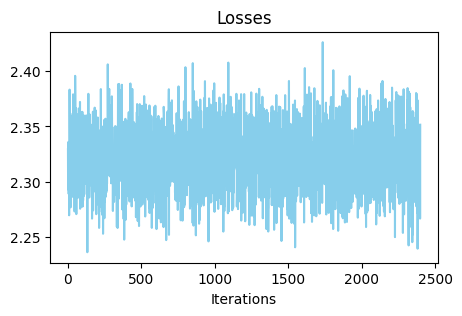

In [55]:
# plot graphs
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(5,3))
plt.plot(losses, color='skyblue')
plt.title('Losses')
plt.xlabel('Iterations')

In [ ]:
for param in lin_model.parameters():
  print(param)

In [65]:
for batch in dl_test:
  test_logits = lin_model(batch[0])
  pred = torch.argmax(test_logits,dim=1)
  break

In [64]:
test_logits.shape

torch.Size([50, 10])

In [66]:
pred

tensor([3, 2, 1, 3, 3, 1, 3, 3, 1, 3, 3, 3, 2, 3, 1, 3, 3, 3, 2, 3, 2, 2, 3, 0,
        9, 3, 2, 2, 2, 1, 1, 3, 1, 3, 1, 3, 3, 1, 2, 1, 9, 3, 3, 1, 3, 1, 3, 8,
        2, 3])

In [60]:
torch.max(test_logits, dim=1)

torch.return_types.max(
values=tensor([0.1959, 0.4651, 0.1365, 0.3695, 0.2788, 0.1735, 0.1144, 0.2767, 0.5005,
        0.3134, 0.4813, 0.5100, 0.2995, 0.4605, 0.1215, 0.2098, 0.2414, 0.2527,
        0.4435, 0.2862, 0.3766, 0.3653, 0.1526, 0.4090, 0.2080, 0.5173, 0.1472,
        0.3356, 0.4268, 0.2267, 0.2349, 0.1844, 0.2614, 0.5337, 0.1380, 0.2718,
        0.1468, 0.1924, 0.2501, 0.3152, 0.1150, 0.1780, 0.2192, 0.2738, 0.4485,
        0.2710, 0.4570, 0.1351, 0.3778, 0.3020], grad_fn=<MaxBackward0>),
indices=tensor([3, 2, 1, 3, 3, 1, 3, 3, 1, 3, 3, 3, 2, 3, 1, 3, 3, 3, 2, 3, 2, 2, 3, 0,
        9, 3, 2, 2, 2, 1, 1, 3, 1, 3, 1, 3, 3, 1, 2, 1, 9, 3, 3, 1, 3, 1, 3, 8,
        2, 3]))

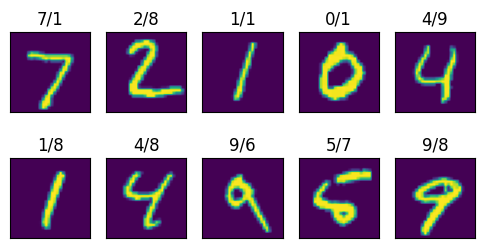

In [70]:
# Display 10 data examples together with their labels
fig,axs=plt.subplots(2,5)
fig.set_size_inches(6,3)
axs=axs.flatten()
preds=torch.argmax(o,dim=1)
for i in range(10):
  axs[i].imshow(batch[0][i].squeeze())
  axs[i].set_title(f"{batch[1][i]}/{preds[i].item()}")
  axs[i].xaxis.set_visible(False)
  axs[i].yaxis.set_visible(False)
  if i == 9:
    break

## MLP model definition

2-layer MLP with ReLU activation:

$$\mathbf{h} = \sigma(\mathbf{x}^T \mathbf{W}{(1)} + \mathbf{b}{(1)}) \\
\mathbf{o} = \mathbf{h}^T \mathbf{W}^{(2)} + \mathbf{b}^{(2)}$$

In [71]:
# Define mlp
in_dim =  28*28
h_dim = 32
class_dim = 10
mlp_model = nn.Sequential(
    nn.Flatten(),
    nn.Linear(in_dim, h_dim, bias=True),
    nn.ReLU(),
    #n.Linear(h_dim, 20, bias=True),
    nn.Linear(h_dim,class_dim, bias=True)
)

In [73]:
mlp_model

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=32, bias=True)
  (2): ReLU()
  (3): Linear(in_features=32, out_features=10, bias=True)
)

### Train mlp model

In [79]:
# Define loss and optimizor
dl_train = DataLoader(mnist_train, batch_size=50, shuffle=True)
dl_test = DataLoader(mnist_test, batch_size=50) # no need to shuffle 
in_dim =  28*28
h_dim = 32
class_dim = 10
mlp_model = nn.Sequential(
    nn.Flatten(),
    nn.Linear(in_dim, h_dim, bias=True),
    nn.ReLU(),
    #n.Linear(h_dim, 20, bias=True),
    nn.Linear(h_dim,class_dim, bias=True)
)
loss_func = nn.CrossEntropyLoss()
loss = loss_func(logits, batch[1])
optimizer = optim.SGD(mlp_model.parameters(), lr=0.001) #we can use optim.Adam instead of SGD

max_epochs = 2
losses = []
for epoch in range(max_epochs):
  for batch in dl_train:
    x_batch, y_batch =  batch[0], batch[1]
    preds =  mlp_model(x_batch) #Predictions
    loss = loss_func(preds,y_batch)
    loss.backward() # get gradients
    optimizer.zero_grad()
    optimizer.step()
    #print(f'Loss {loss}')
    losses.append(loss.item())
  print(losses)

[2.2984771728515625, 2.3275952339172363, 2.300173759460449, 2.339816093444824, 2.296769618988037, 2.3019988536834717, 2.3120534420013428, 2.296663522720337, 2.309176445007324, 2.325270175933838, 2.3148627281188965, 2.2969868183135986, 2.2934718132019043, 2.3162102699279785, 2.335831642150879, 2.3030896186828613, 2.3238272666931152, 2.2894341945648193, 2.305366277694702, 2.321638822555542, 2.3207192420959473, 2.328598976135254, 2.2975330352783203, 2.3075242042541504, 2.3063859939575195, 2.317911148071289, 2.3124136924743652, 2.3207204341888428, 2.298522710800171, 2.3126726150512695, 2.308319330215454, 2.3328349590301514, 2.3151602745056152, 2.3094615936279297, 2.3046560287475586, 2.3180058002471924, 2.309548854827881, 2.313239336013794, 2.326497793197632, 2.311077833175659, 2.2923479080200195, 2.2848150730133057, 2.3222272396087646, 2.2929418087005615, 2.3193182945251465, 2.324141025543213, 2.266979455947876, 2.2652323246002197, 2.289991617202759, 2.3102729320526123, 2.300560712814331, 

Text(0.5, 0, 'Iterations')

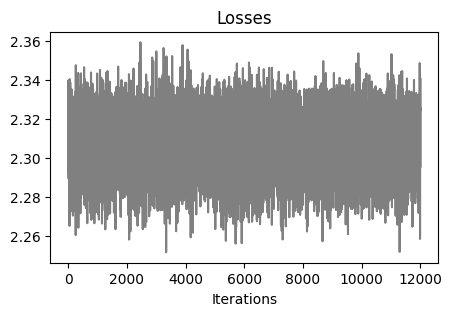

In [81]:
# plot graphs
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(5,3))
plt.plot(losses, color='gray')
plt.title('Losses')
plt.xlabel('Iterations')

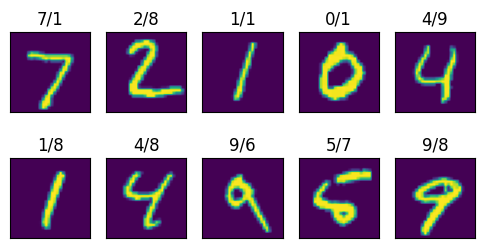

In [80]:
# Display 10 data examples together with their labels
for batch in dl_test:
  test_logits = mlp_model(batch[0])
  preds = torch.argmax(test_logits,dim=1)
  break

fig,axs=plt.subplots(2,5)
fig.set_size_inches(6,3)
axs=axs.flatten()
preds=torch.argmax(o,dim=1)
for i in range(10):
  axs[i].imshow(batch[0][i].squeeze())
  axs[i].set_title(f"{batch[1][i]}/{preds[i].item()}")
  axs[i].xaxis.set_visible(False)
  axs[i].yaxis.set_visible(False)
  if i == 9:
    break